In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
import pandas as pd

Effectuer une ACP sur ces données en prenant soin d'extraire les données pertinentes pour effectuer la classification d'abord sur l'espèce (sp), puis sur le sexe (sex) et enfin en croisant espèce et sexe.

data = pd.read_csv("../data/crabs.csv") 
data.head(2)

In [3]:
df = pd.DataFrame({
    'SER':[-1,0,3,2],
    'QUA':[3,1,-1,-3],
    'PRIX':[-2,-1,-2,1],
})

In [4]:
df.index = ['E1', 'E2', 'E3', 'E4']

In [5]:
Z = df.values
print(Z)

[[-1  3 -2]
 [ 0  1 -1]
 [ 3 -1 -2]
 [ 2 -3  1]]


In [6]:
# Centrer reduit
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(Z)
Z

array([[-1.26491106,  1.34164079, -0.81649658],
       [-0.63245553,  0.4472136 ,  0.        ],
       [ 1.26491106, -0.4472136 , -0.81649658],
       [ 0.63245553, -1.34164079,  1.63299316]])

In [7]:
# Matrice de corrélation

#Z[:,ind_col]
df1=pd.DataFrame({"C1": Z[:,0], "C2": Z[:,1], "C3": Z[:,2]})
df1

mat_corr=df1.corr()
mat_corr=mat_corr.values
mat_corr

array([[ 1.        , -0.84852814,  0.25819889],
       [-0.84852814,  1.        , -0.73029674],
       [ 0.25819889, -0.73029674,  1.        ]])

In [8]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
coord
#2
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)



[2.25498344e+00 7.45016556e-01 9.09938426e-33]


In [9]:
# Verifier valeur propre   e+00= * 10の0次方  ； e-01 = 10の-1次方
D,V=np.linalg.eig(mat_corr)
D

array([2.25498344e+00, 7.45016556e-01, 2.08092261e-16])

In [10]:
#ratio de réprésentation des valeurs prores
# CTRap Valeur propre pourcentage
print([ratio for ratio in acp.explained_variance_ratio_])

[0.7516611478423584, 0.24833885215764165, 3.0331280881849954e-33]


In [11]:
#Vecteur prepro
V

array([[-0.5531024 ,  0.64521311,  0.52704628],
       [ 0.66556564, -0.03829921,  0.74535599],
       [-0.50109891, -0.76304208,  0.40824829]])

In [12]:
# ????
acp.components_

array([[ 0.5531024 , -0.66556564,  0.50109891],
       [ 0.64521311, -0.03829921, -0.76304208],
       [-0.52704628, -0.74535599, -0.40824829]])

In [6]:
import sklearn

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
Z = sc.fit_transform(mat1)

In [10]:
#1
print(Z)

[[-1.26491106  1.34164079 -0.81649658]
 [-0.63245553  0.4472136   0.        ]
 [ 1.26491106 -0.4472136  -0.81649658]
 [ 0.63245553 -1.34164079  1.63299316]]


In [80]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

3


In [70]:
#matrice de colleration
from numpy import transpose
D = np.array([[ 0.25, 0, 0 ,0], [0, 0.25, 0,0], [0, 0, 0.25,0],[0, 0, 0,0.25]])
D
ZT = transpose(Z).tolist()
ZT
R1 = np.dot(ZT, D)
R1
R2= np.dot(R1, Z)
print(R2)

[[ 1.         -0.84852814  0.25819889]
 [-0.84852814  1.         -0.73029674]
 [ 0.25819889 -0.73029674  1.        ]]


In [71]:
#2
# valeurs propres
variance = acp.explained_variance_
#print(variance)
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)

[2.25498344e+00 7.45016556e-01 9.09938426e-33]


In [72]:
#3
# CTRap
print(acp.explained_variance_ratio_)

[7.51661148e-01 2.48338852e-01 3.03312809e-33]


In [54]:
#5
#Composant principal
u1 = np.array([[ 0.553 ], [-0.665], [0.501]])
u1
CP1 = np.dot(Z, u1)
CP1

array([[-2.00075173],
       [-0.64714495],
       [ 0.58782807],
       [ 2.06006861]])

In [76]:
#6
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(4):
     plt.annotate(df.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [82]:
#7
# contributions aux axes
ctr = coord**2
for j in range(3):
     ctr[:,j] = ctr[:,j]/(4*eigval[j])*100

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

   id      CTR_1      CTR_2
0  E1  44.422572   2.006000
1  E2   4.647572   6.066714
2  E3   3.834803  71.165197
3  E4  47.095054  20.762089


In [84]:
#8
# qualité de représentation des individus - COS2
cos2 = coord**2
di = np.sum(Z**2,axis=1)
for j in range(3):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

   id    COS2_1    COS2_2
0  E1  0.985300  0.014700
1  E2  0.698680  0.301320
2  E3  0.140228  0.859772
3  E4  0.872865  0.127135


In [89]:
#9
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((3,3))
for k in range(3):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
#print(corvar)
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

     id     COR_1     COR_2
0   SER  0.830572  0.556911
1   QUA -0.999453 -0.033058
2  PRIX  0.752480 -0.658615


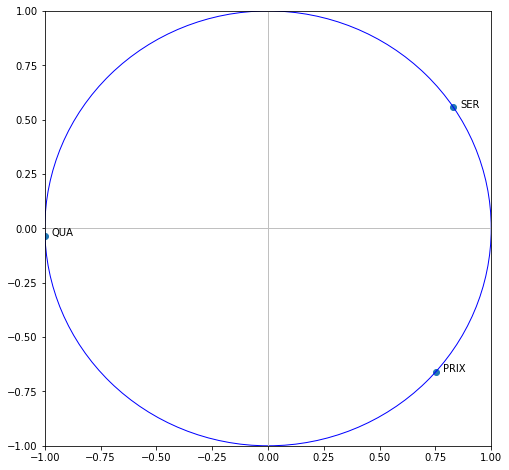

In [90]:
#10
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(3):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [92]:
#11 有问题
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((3,3))
for k in range(3):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
# contributions aux axes
ctr = coord**2
for j in range(3):
     ctr[:,j] = ctr[:,j]/(4*eigval[j])*100

print(pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

[[ 8.30571874e-01  5.56911449e-01 -5.02753094e-17]
 [-9.99453445e-01 -3.30577097e-02 -7.11000245e-17]
 [ 7.52480311e-01 -6.58614745e-01 -3.89430872e-17]]
   id      CTR_1      CTR_2
0  E1  44.422572   2.006000
1  E2   4.647572   6.066714
2  E3   3.834803  71.165197
3  E4  47.095054  20.762089


In [91]:
#12
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

     id    COS2_1    COS2_2
0   SER  0.689850  0.310150
1   QUA  0.998907  0.001093
2  PRIX  0.566227  0.433773
